In [1]:
# A Quick recap of the problem...

# Given a (Uid, Qid, Adid) under certain Ad setting (such as pos, depth etc.) we want to predict the Ad CTR.

# Recall, CTR(Ad) = #clicks/#impressions


In [2]:
# Quick reminder, there are total of 7 files involved in this problem listed as follows:

# 1. training file

# 2. testing file + solution file

# 3. user file: corr. to every user we maintain their gender & age info.

# 4. Ad title file: corr. to every ad we maintain their titles(hashed). We have used count of words in title.

# 5. Ad description file: corr. to every ad we maintain its desc(hashed).We have used count of words in Ad desc.

# 6. user query file: corr. to every qid we have the query(issued). We have used count of words used in a query.

# 7. keyword file: We have used count of words in keyword.

# Source/Useful Links:  

Source : https://www.kaggle.com/c/kddcup2012-track2 <br>

pdf : https://jyunyu.csie.org/docs/pubs/kddcup2012paper.pdf 




In [3]:
# Part 1 - Data Preparation...

# Goal of Part 1: Make training & testing data ready for building model.

In [4]:
# Loading Libraries...

import pandas as pd
import numpy as np

In [5]:
#  The training set contains 155,750,158 instances but we are limiting ourselves to 5,000,000

In [6]:

# 1.1.1. Loading training data...

column  = ['clicks', 'impressions', 'AdURL', 'AdId', 'AdvId', 'Depth', 'Pos', 'QId', 'KeyId', 'TitleId', 'DescId', 'UId']
train   = pd.read_csv('track2/track2/training.txt', sep='\t', header=None, names=column,nrows = 5000000)
train.head()


,clicks,impressions,AdURL,AdId,AdvId,Depth,Pos,QId,KeyId,TitleId,DescId,UId
0,0,1,4298118681424644510,7686695,385,3,3,1601,5521,7709,576,490234
1,0,1,4860571499428580850,21560664,37484,2,2,2255103,317,48989,44771,490234
2,0,1,9704320783495875564,21748480,36759,3,3,4532751,60721,685038,29681,490234
3,0,1,13677630321509009335,3517124,23778,3,1,1601,2155,1207,1422,490234
4,0,1,3284760244799604489,20758093,34535,1,1,4532751,77819,266618,222223,490234


In [7]:
# we observe that some categories come with only a few or even no instances.

# Computing the click-through rate directly for those categories would result in inaccurate estimations 

# because of the insuﬃcient statistics. Thus, we apply smoothing methods during click-through rate estima-tion. 

# We mainly use a simple additive smoothing  pseudo-CTR = click + α × β #impression + β

# and we name it pseudo click-through rate (pseudo-CTR). In our experiments, we set α as 0.05 and β as 75. 

In [8]:

# Add target variable CTR as #clicks / #impression

train['CTR'] = train['clicks'] * 1.0 / train['impressions']

#adding relative position as a new feature
train['RPosition'] = train['Depth'] - train['Pos'] * 1.0 / train['Depth']

# Add predicted CTR as #clicks + ab / #impressions + b
train['pCTR'] = (1.0 * train['clicks'] + 0.05 * 75) / (train['impressions'] + 75)

train.head()


,clicks,impressions,AdURL,AdId,AdvId,Depth,Pos,QId,KeyId,TitleId,DescId,UId,CTR,RPosition,pCTR
0,0,1,4298118681424644510,7686695,385,3,3,1601,5521,7709,576,490234,0.0,2.000000,0.049342
1,0,1,4860571499428580850,21560664,37484,2,2,2255103,317,48989,44771,490234,0.0,1.000000,0.049342
2,0,1,9704320783495875564,21748480,36759,3,3,4532751,60721,685038,29681,490234,0.0,2.000000,0.049342
3,0,1,13677630321509009335,3517124,23778,3,1,1601,2155,1207,1422,490234,0.0,2.666667,0.049342
4,0,1,3284760244799604489,20758093,34535,1,1,4532751,77819,266618,222223,490234,0.0,0.000000,0.049342


In [9]:

train.shape


(5000000, 15)

In [10]:
# The test set contains 20,297,594 instances, we are limiting ourselves to 1,000,000

In [11]:

# 1.1.2 Loading test data...

column  = ['AdURL', 'AdId', 'AdvId', 'Depth', 'Pos', 'QId', 'KeyId', 'TitleId', 'DescId', 'UId']
test = pd.read_csv('test/test.txt', sep='\t', header=None, names=column, nrows = 1000000)

test.head()

,AdURL,AdId,AdvId,Depth,Pos,QId,KeyId,TitleId,DescId,UId
0,5325279403472852193,22166806,38756,3,3,6415,34,3341,2080,490234
1,14340390157469404125,3111380,23777,3,1,6415,8872,62423,56167,490234
2,16772851793638846604,22111129,38584,3,2,6415,8872,454986,378040,490234
3,5325279403472852193,22166807,38756,2,1,83,34,5360,2080,490234
4,12057878999086460853,20180629,27961,2,2,83,34,328,455,490234


In [12]:

test.shape


(1000000, 10)

In [13]:
# As you can see the test data provided for this problem doesn't provide the means to calculate target variable CTR.

# However at the end of competition Kaggle posted a solution.txt file that provides the #Clicks & #Impressions corr.

# to each testing instance. Hence, I have merged the solution.txt with test dataset.

In [14]:

# Loading test data solution...

solution = pd.read_csv('KDD_Track2_solution.csv',  nrows=1000000)
solution.rename(columns = {'I clicks':'clicks'}, inplace = True)
solution = solution[['clicks', 'impressions']].copy()
solution.head()

,clicks,impressions
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [15]:

solution.shape


(1000000, 2)

In [16]:

# concatanating test & solution 

test = pd.concat([solution, test], axis=1)
test.head()

,clicks,impressions,AdURL,AdId,AdvId,Depth,Pos,QId,KeyId,TitleId,DescId,UId
0,0,1,5325279403472852193,22166806,38756,3,3,6415,34,3341,2080,490234
1,0,1,14340390157469404125,3111380,23777,3,1,6415,8872,62423,56167,490234
2,0,1,16772851793638846604,22111129,38584,3,2,6415,8872,454986,378040,490234
3,0,1,5325279403472852193,22166807,38756,2,1,83,34,5360,2080,490234
4,0,1,12057878999086460853,20180629,27961,2,2,83,34,328,455,490234


In [17]:

# Add target variable CTR to test set...

test['CTR'] = test['clicks'] * 1.0 / test['impressions']
test['RPosition'] = test['Depth'] - test['Pos'] * 1.0 / test['Depth']

# Add predicted CTR as #clicks + ab / #impressions + b
test['pCTR'] = (1.0 * test['clicks'] + 0.05 * 75) / (test['impressions'] + 75)

test.head()

,clicks,impressions,AdURL,AdId,AdvId,Depth,Pos,QId,KeyId,TitleId,DescId,UId,CTR,RPosition,pCTR
0,0,1,5325279403472852193,22166806,38756,3,3,6415,34,3341,2080,490234,0.0,2.000000,0.049342
1,0,1,14340390157469404125,3111380,23777,3,1,6415,8872,62423,56167,490234,0.0,2.666667,0.049342
2,0,1,16772851793638846604,22111129,38584,3,2,6415,8872,454986,378040,490234,0.0,2.333333,0.049342
3,0,1,5325279403472852193,22166807,38756,2,1,83,34,5360,2080,490234,0.0,1.500000,0.049342
4,0,1,12057878999086460853,20180629,27961,2,2,83,34,328,455,490234,0.0,1.000000,0.049342


In [18]:

test.shape


(1000000, 15)

In [19]:
#  Now, we will load additional files provided in the problem, extract useful info. from them & merge
#  with training & testing datasets...


In [20]:

def count(sentence):
    '''
        (str) -> (int)
        Returns no. of words in a sentence.
    '''
    return len(str(sentence).split('|'))


In [21]:


# Load User Data..

user_col  = ['UId', 'Gender', 'Age']
user      = pd.read_csv('track2/track2/userid_profile.txt', sep='\t', header=None, names=user_col)

# Load Query Data..

query_col = ['QId', 'Query']
query     = pd.read_csv('track2/track2/queryid_tokensid.txt', sep='\t', header=None, names=query_col)

# Load Ad Description Data..

desc_col  = ['DescId', 'Description']
desc      = pd.read_csv('track2/track2/descriptionid_tokensid.txt', sep='\t', header=None, names=desc_col)

# Load Ad Title Data..

title_col = ['TitleId', 'Title']
title     = pd.read_csv('track2/track2/titleid_tokensid.txt', sep='\t', header=None, names=title_col)

# Load Keyword Data..

key_col  = ['KeyId', 'Keyword']
keyword  = pd.read_csv('track2/track2/purchasedkeywordid_tokensid.txt', sep='\t', header=None, names=key_col)

# Count no. of tokens in a query issued by a user.

query['QCount'] = query['Query'].apply(count)
del query['Query']

# Count no. of tokens in title of an advertisement.

title['TCount'] = title['Title'].apply(count)
del title['Title']

# Count no. of tokens in description of an advertisement.

desc['DCount'] = desc['Description'].apply(count)
del desc['Description']

# Count no. of tokens in purchased keyword.

keyword['KCount'] = keyword['Keyword'].apply(count)
del keyword['Keyword']



In [22]:

# Preparing training dataset...

# Merging training data with user, query, title, keyword & desc on appropriate keys to get data..

train = pd.merge(train, user,  on='UId')
train = pd.merge(train, query, on='QId')
train = pd.merge(train, title, on='TitleId')
train = pd.merge(train, desc,  on='DescId')
train = pd.merge(train, keyword, on='KeyId')

train.head()

,clicks,impressions,AdURL,AdId,AdvId,Depth,Pos,QId,KeyId,TitleId,...,UId,CTR,RPosition,pCTR,Gender,Age,QCount,TCount,DCount,KCount
0,0,1,4298118681424644510,7686695,385,3,3,1601,5521,7709,...,490234,0.0,2.0,0.049342,1,3,1,8,21,3
1,0,2,4298118681424644510,7686695,385,2,2,1601,5521,7709,...,30161,0.0,1.0,0.048701,1,3,1,8,21,3
2,0,1,4298118681424644510,7686695,385,2,2,1601,5521,7709,...,1873171,0.0,1.0,0.049342,2,5,1,8,21,3
3,0,1,4298118681424644510,7686695,385,3,3,1601,5521,7709,...,6558374,0.0,2.0,0.049342,0,2,1,8,21,3
4,0,2,4298118681424644510,7686695,385,3,3,1601,5521,7709,...,1566180,0.0,2.0,0.048701,2,5,1,8,21,3


In [23]:

# Preparing testing dataset...

# Merging testing data with user, query, title, keyword & desc on appropriate keys to get data..

test = pd.merge(test, user,  on='UId')
test = pd.merge(test, query, on='QId')
test = pd.merge(test, title, on='TitleId')
test = pd.merge(test, desc,  on='DescId')
test = pd.merge(test, keyword, on='KeyId')

test.head()

,clicks,impressions,AdURL,AdId,AdvId,Depth,Pos,QId,KeyId,TitleId,...,UId,CTR,RPosition,pCTR,Gender,Age,QCount,TCount,DCount,KCount
0,0,1,5325279403472852193,22166806,38756,3,3,6415,34,3341,...,490234,0.0,2.0,0.049342,1,3,1,14,26,1
1,0,1,5325279403472852193,22166806,38756,3,3,4902,34,3341,...,15900,0.0,2.0,0.049342,1,5,2,14,26,1
2,0,1,5325279403472852193,22166806,38756,2,2,308,34,3341,...,302714,0.0,1.0,0.049342,2,3,2,14,26,1
3,0,1,5325279403472852193,22166806,38756,3,3,308,34,3341,...,2235546,0.0,2.0,0.049342,1,3,2,14,26,1
4,0,1,5325279403472852193,22166806,38756,3,3,308,34,3341,...,111500,0.0,2.0,0.049342,1,4,2,14,26,1


In [24]:
# Adding some useful features to train & test set which will be useful later.

# Since most of the features in the dataset are categorical features we will transform them into rate features...

In [25]:

# A few helper methods...
train_avg_ctr = {}
train_avg_pctr = {}

def add(dataset, key, label, col, op):
    
    '''
        add a new feature 'label' to the 'dataset' using 'key' by applying operation 'op'.
    '''
    
    temp = dataset
    
    result = temp.groupby(key).agg([op])
    index  = result.index
    ctr    = result.get_values()
    
    temp = pd.DataFrame()
    temp[key] = index
    temp[label] = ctr
    if col=='CTR':
        train_avg_ctr[label]=np.mean(ctr)
    elif col == 'pCTR':
        train_avg_pctr[label]=np.mean(ctr)
        
    return temp


def addfeatures(dataset, train, keys, labels, col, op):
    
    '''
        addfeatures is used to add a set of features('labels') using 'keys' to the 'dataset'.
        The newly added features are constructed by applying 'op'(mean) on 'col' where 'col' is a 
        feature of the 'dataset'.
    '''

    for key in keys:
        temp = train[[key, col]]
        temp = add(temp, key, labels[key], col, op)
        dataset = pd.merge(dataset, temp, on=key, how='left')
    
    return dataset
    


In [26]:
# For each categorical feature, we compute the average click-through rate as an additional one-dimensional feature. 

# Take AdID as an example. For each AdID, we com- pute the average click-through rate for all instances with the same AdID, 

# and use this value as a single feature. This feature represents the estimated click-through rate given its category. 

# We compute this kind of feature for AdURL, AdID, AdvertiserID, QueryID, KeywordID, TitleID, DescriptionID, 

#  UserID, DisplayURL, user’s age, user’s gender and (depth−position)/depth.  

In [27]:

# Add Click Through Rate features to training set...

keys = ['AdURL', 'AdId', 'AdvId', 'Depth', 'Pos', 'QId', 'KeyId', 'TitleId', 'DescId', 'UId', 'Gender', 'Age','RPosition']
labels = {'AdURL':'mAdURL', 'AdId':'mAdCTR', 'AdvId':'mAdvCTR', 'Depth':'mDepthCTR', 'Pos':'mPosCTR', 'QId':'mQId', 
          'KeyId':'mKeyId', 'TitleId':'mTitleId', 'DescId':'mDescId', 'UId':'mUId', 'Gender': 'mGender', 'Age':'mAge','RPosition':'mRPosition'}

train_updated = addfeatures(train,train, keys, labels, 'CTR', 'mean')
train_updated.head()

,clicks,impressions,AdURL,AdId,AdvId,Depth,Pos,QId,KeyId,TitleId,...,mDepthCTR,mPosCTR,mQId,mKeyId,mTitleId,mDescId,mUId,mGender,mAge,mRPosition
0,0,1,4298118681424644510,7686695,385,3,3,1601,5521,7709,...,0.035616,0.018944,0.040284,0.025974,0.024,0.038875,0.000000,0.044093,0.043846,0.018944
1,0,2,4298118681424644510,7686695,385,2,2,1601,5521,7709,...,0.047993,0.030773,0.040284,0.025974,0.024,0.038875,0.007246,0.044093,0.043846,0.031384
2,0,1,4298118681424644510,7686695,385,2,2,1601,5521,7709,...,0.047993,0.030773,0.040284,0.025974,0.024,0.038875,0.000000,0.045860,0.047465,0.031384
3,0,1,4298118681424644510,7686695,385,3,3,1601,5521,7709,...,0.035616,0.018944,0.040284,0.025974,0.024,0.038875,0.000000,0.045276,0.045257,0.018944
4,0,2,4298118681424644510,7686695,385,3,3,1601,5521,7709,...,0.035616,0.018944,0.040284,0.025974,0.024,0.038875,0.130952,0.045860,0.047465,0.018944


In [28]:

# Add Click Through Rate features to testing set...

test_updated = addfeatures(test,train, keys, labels, 'CTR', 'mean')

test_updated.head()

,clicks,impressions,AdURL,AdId,AdvId,Depth,Pos,QId,KeyId,TitleId,...,mDepthCTR,mPosCTR,mQId,mKeyId,mTitleId,mDescId,mUId,mGender,mAge,mRPosition
0,0,1,5325279403472852193,22166806,38756,3,3,6415,34,3341,...,0.035616,0.018944,0.000000,0.031357,0.0,0.05,0.000000,0.044093,0.043846,0.018944
1,0,1,5325279403472852193,22166806,38756,3,3,4902,34,3341,...,0.035616,0.018944,0.075758,0.031357,0.0,0.05,0.007576,0.044093,0.047465,0.018944
2,0,1,5325279403472852193,22166806,38756,2,2,308,34,3341,...,0.047993,0.030773,0.080735,0.031357,0.0,0.05,0.304348,0.045860,0.043846,0.031384
3,0,1,5325279403472852193,22166806,38756,3,3,308,34,3341,...,0.035616,0.018944,0.080735,0.031357,0.0,0.05,NaN,0.044093,0.043846,0.018944
4,0,1,5325279403472852193,22166806,38756,3,3,308,34,3341,...,0.035616,0.018944,0.080735,0.031357,0.0,0.05,NaN,0.044093,0.042321,0.018944


In [29]:
# checking the null values in every column of test data
test_updated.isnull().sum()

clicks              0
impressions         0
AdURL               0
AdId                0
AdvId               0
Depth               0
Pos                 0
QId                 0
KeyId               0
TitleId             0
DescId              0
UId                 0
CTR                 0
RPosition           0
pCTR                0
Gender              0
Age                 0
QCount              0
TCount              0
DCount              0
KCount              0
mAdURL          32900
mAdCTR          87306
mAdvCTR         28914
mDepthCTR           0
mPosCTR             0
mQId           355645
mKeyId          48754
mTitleId       210667
mDescId        172196
mUId           629664
mGender             0
mAge                0
mRPosition          0
dtype: int64

In [30]:
# we can observe
# 1. mAdURL
# 2. mAdCTR
# 3. mAdvCTR
# 4. mQId
# 5. mKeyId
# 6. mTitleId
# 7. mDescId
# 8. mUId
# these features are filled with NaN values while adding new features 

In [31]:
# we will try to fill the NaN values with  the gloabal average of particular feature among whole train dataset
train_avg_ctr

{'mAdURL': 0.042683532974941985,
 'mAdCTR': 0.05013193560876735,
 'mAdvCTR': 0.039449742909037376,
 'mDepthCTR': 0.04312930130335679,
 'mPosCTR': 0.03496579003084268,
 'mQId': 0.03870393789270089,
 'mKeyId': 0.059187933569904386,
 'mTitleId': 0.0527227126355866,
 'mDescId': 0.05088111547947272,
 'mUId': 0.052807104386749654,
 'mGender': 0.04507620832251108,
 'mAge': 0.046004634698141485,
 'mRPosition': 0.04154847895253962}

In [32]:
test_updated = test_updated.fillna(value=train_avg_ctr)

In [33]:
# checking the null values in every column of test data after filling missing values
test_updated.isnull().sum()

clicks         0
impressions    0
AdURL          0
AdId           0
AdvId          0
Depth          0
Pos            0
QId            0
KeyId          0
TitleId        0
DescId         0
UId            0
CTR            0
RPosition      0
pCTR           0
Gender         0
Age            0
QCount         0
TCount         0
DCount         0
KCount         0
mAdURL         0
mAdCTR         0
mAdvCTR        0
mDepthCTR      0
mPosCTR        0
mQId           0
mKeyId         0
mTitleId       0
mDescId        0
mUId           0
mGender        0
mAge           0
mRPosition     0
dtype: int64

In [34]:
#  We generate pseudo-CTR features for AdID, AdvertiserID, QueryID, KeywordID, TitleID, DescriptionID, 

#  UserID, DisplayURL, user’s age, user’s gender and (depth−position)/depth. 


In [35]:

# Add predicted Click Through Rate features to training set...

keys = ['AdURL', 'AdId', 'AdvId', 'Depth', 'Pos', 'QId', 'KeyId', 'TitleId', 'DescId', 'UId', 'Gender', 'Age','RPosition']
labels = {'AdURL':'pAdURL', 'AdId':'pAdCTR', 'AdvId':'pAdvCTR', 'Depth':'pDepthCTR', 'Pos':'pPosCTR', 'QId':'pQId', 
          'KeyId':'pKeyId', 'TitleId':'pTitleId', 'DescId':'pDescId', 'UId':'pUId', 'Gender': 'pGender', 'Age':'pAge','RPosition':'pRPosition'}

train_updated = addfeatures(train_updated,train, keys, labels, 'pCTR', 'mean')
train_updated.head()

,clicks,impressions,AdURL,AdId,AdvId,Depth,Pos,QId,KeyId,TitleId,...,pDepthCTR,pPosCTR,pQId,pKeyId,pTitleId,pDescId,pUId,pGender,pAge,pRPosition
0,0,1,4298118681424644510,7686695,385,3,3,1601,5521,7709,...,0.049733,0.049501,0.049798,0.049585,0.049546,0.049729,0.049342,0.049856,0.049863,0.049501
1,0,2,4298118681424644510,7686695,385,2,2,1601,5521,7709,...,0.049929,0.049677,0.049798,0.049585,0.049546,0.049729,0.049368,0.049856,0.049863,0.049689
2,0,1,4298118681424644510,7686695,385,2,2,1601,5521,7709,...,0.049929,0.049677,0.049798,0.049585,0.049546,0.049729,0.049289,0.049904,0.049916,0.049689
3,0,1,4298118681424644510,7686695,385,3,3,1601,5521,7709,...,0.049733,0.049501,0.049798,0.049585,0.049546,0.049729,0.049342,0.049889,0.049889,0.049501
4,0,2,4298118681424644510,7686695,385,3,3,1601,5521,7709,...,0.049733,0.049501,0.049798,0.049585,0.049546,0.049729,0.051716,0.049904,0.049916,0.049501


In [36]:
# checking the null values in every column of train data
train_updated.isnull().sum()

clicks         0
impressions    0
AdURL          0
AdId           0
AdvId          0
Depth          0
Pos            0
QId            0
KeyId          0
TitleId        0
DescId         0
UId            0
CTR            0
RPosition      0
pCTR           0
Gender         0
Age            0
QCount         0
TCount         0
DCount         0
KCount         0
mAdURL         0
mAdCTR         0
mAdvCTR        0
mDepthCTR      0
mPosCTR        0
mQId           0
mKeyId         0
mTitleId       0
mDescId        0
mUId           0
mGender        0
mAge           0
mRPosition     0
pAdURL         0
pAdCTR         0
pAdvCTR        0
pDepthCTR      0
pPosCTR        0
pQId           0
pKeyId         0
pTitleId       0
pDescId        0
pUId           0
pGender        0
pAge           0
pRPosition     0
dtype: int64

In [37]:
# we will try to fill the NaN values with  the gloabal average of particular feature among whole train dataset
train_avg_pctr

{'pAdURL': 0.049837782154930656,
 'pAdCTR': 0.04995451552803654,
 'pAdvCTR': 0.049786830606215984,
 'pDepthCTR': 0.049849564136883684,
 'pPosCTR': 0.04973412521783558,
 'pQId': 0.04980927172756563,
 'pKeyId': 0.0500856992372525,
 'pTitleId': 0.0499927604186036,
 'pDescId': 0.0499635537426502,
 'pUId': 0.05001262762031949,
 'pGender': 0.049883050216235535,
 'pAge': 0.04989394713035658,
 'pRPosition': 0.04982557062215825}

In [38]:

# Add predicted Click Through Rate features to testing set...

test_updated = addfeatures(test_updated,train, keys, labels, 'pCTR', 'mean')
test_updated.head()

,clicks,impressions,AdURL,AdId,AdvId,Depth,Pos,QId,KeyId,TitleId,...,pDepthCTR,pPosCTR,pQId,pKeyId,pTitleId,pDescId,pUId,pGender,pAge,pRPosition
0,0,1,5325279403472852193,22166806,38756,3,3,6415,34,3341,...,0.049733,0.049501,0.049330,0.049707,0.048397,0.049889,0.049342,0.049856,0.049863,0.049501
1,0,1,5325279403472852193,22166806,38756,3,3,4902,34,3341,...,0.049733,0.049501,0.050271,0.049707,0.048397,0.049889,0.049342,0.049856,0.049916,0.049501
2,0,1,5325279403472852193,22166806,38756,2,2,308,34,3341,...,0.049929,0.049677,0.050383,0.049707,0.048397,0.049889,0.053263,0.049904,0.049863,0.049689
3,0,1,5325279403472852193,22166806,38756,3,3,308,34,3341,...,0.049733,0.049501,0.050383,0.049707,0.048397,0.049889,NaN,0.049856,0.049863,0.049501
4,0,1,5325279403472852193,22166806,38756,3,3,308,34,3341,...,0.049733,0.049501,0.050383,0.049707,0.048397,0.049889,NaN,0.049856,0.049835,0.049501


In [39]:
# checking the null values in every column of test data
train_updated.isnull().sum()

clicks         0
impressions    0
AdURL          0
AdId           0
AdvId          0
Depth          0
Pos            0
QId            0
KeyId          0
TitleId        0
DescId         0
UId            0
CTR            0
RPosition      0
pCTR           0
Gender         0
Age            0
QCount         0
TCount         0
DCount         0
KCount         0
mAdURL         0
mAdCTR         0
mAdvCTR        0
mDepthCTR      0
mPosCTR        0
mQId           0
mKeyId         0
mTitleId       0
mDescId        0
mUId           0
mGender        0
mAge           0
mRPosition     0
pAdURL         0
pAdCTR         0
pAdvCTR        0
pDepthCTR      0
pPosCTR        0
pQId           0
pKeyId         0
pTitleId       0
pDescId        0
pUId           0
pGender        0
pAge           0
pRPosition     0
dtype: int64

In [40]:
test_updated = test_updated.fillna(value=train_avg_pctr)

In [41]:
# Now that training & testing dataset are ready 

In [42]:
# we will consider only pseduo features for both train and test

train_x = train_updated[['pAdURL','pAdCTR', 'pAdvCTR','pPosCTR','pQId', 
          'pKeyId', 'pTitleId', 'pDescId','pUId','pGender','pAge','pRPosition']].copy()

train_y = train_updated[['CTR']].copy()

In [43]:
test_x = test_updated[['pAdURL','pAdCTR', 'pAdvCTR','pPosCTR','pQId', 
          'pKeyId', 'pTitleId', 'pDescId','pUId','pGender','pAge','pRPosition']].copy()

test_y = test_updated[['CTR']].copy()

In [44]:
# Goal 2 ..performance metric


<font face = "Comic sans MS" size ="3" color = 'black'>
<H3><u> Performance Metric:</u></H3><br>
<ul>
<li> AUC </li>
<li> MAPE </li>
</ul>
<br>
Question ?? How we calculate AUC here..!<br>

Lets try to understand- 
<ul>
 <li> The goal of the competition is to predict the click-through rate (#click / #impression) for each instance in the test set.</li>
 <br>
 <li> The goodness of the predictions is evaluated by the area under curve which is equivalent to the probability that a random pair of a positive sample (clicked ad) and a negative one (unclicked ad) is ranked correctly using the predicted click-through rate. </li>
 <br>
 <li> That is, an equivalent way of maximizing the AUC is to divide each instance into (#click) of positive samples and (#impression-#click) neg- ative samples, and then take #click on y-axis and #impressions on x-axis and calculate area under curve by applying trapezial rule for better approximation using the predicted click-through rate.</li></ul></font>
                    
                                                          /|
                                                         / |
                                                        /  |
                                                        |  |
                                                        |  |
                                                        +--+
<font face = "Comic sans MS" size ="3" color = 'black'>
The area of this can be computed as average height * width = (height_left+height_right)/2 + width <br>
=>  auc = (old_click_sum+click_sum) * no_click / 2.0  
<br>
The area is computed by cutting it into vertical slices at every change </font>

(Youtube link: https://www.youtube.com/watch?v=Yio4HbkQvkA)

  

In [45]:
def scoreClickAUC(num_clicks, num_impressions, predicted_ctr):
    """
    Calculates the area under the ROC curve (AUC) for click rates

    Parameters
    ----------
    num_clicks : a list containing the number of clicks

    num_impressions : a list containing the number of impressions

    predicted_ctr : a list containing the predicted click-through rates

    Returns
    -------
    auc : the area under the ROC curve (AUC) for click rates
    """
     #sorting the values in descending order and store the index
    i_sorted = sorted(range(len(predicted_ctr)),key=lambda i: predicted_ctr[i],
                      reverse=True)
    auc_temp = 0.0
    click_sum = 0.0
    old_click_sum = 0.0
    no_click = 0.0
    no_click_sum = 0.0

    # treat all instances with the same predicted_ctr as coming from the same bucket
    last_ctr = predicted_ctr[i_sorted[0]] + 1.0

    for i in range(len(predicted_ctr)):
        # when prev_ctr value at i-1 not match with current ctr value at i
        if last_ctr != predicted_ctr[i_sorted[i]]: 
            auc_temp += (click_sum+old_click_sum) * no_click / 2.0        
            old_click_sum = click_sum
            no_click = 0.0
            last_ctr = predicted_ctr[i_sorted[i]] #updating the last ctr value 
        # Calculating negative sample as #impressions - #clicks    
        no_click += num_impressions[i_sorted[i]] - num_clicks[i_sorted[i]]
        no_click_sum += num_impressions[i_sorted[i]] - num_clicks[i_sorted[i]]
        # Calculating postive samples as # of clicks 
        click_sum += num_clicks[i_sorted[i]]
    auc_temp += (click_sum+old_click_sum) * no_click / 2.0
    auc = auc_temp / (click_sum * no_click_sum) # That is the scaling to a total area of 1
    return auc

In [46]:

def mean_absolute_percentage_error(y_true, y_pred): 
    """
    return: MAPE 
    
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [49]:
import pickle
import xgboost as xgb
import numpy as np
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
# depth of tree
for i in [2,4]:
    # number of estimators
    for j in [500,800,1000]:
    
        regr = xgb.XGBRegressor(max_depth= i, min_samples_split= 2,learning_rate=0.01,n_estimators = j, verbose=1)
        regr.fit(train_x, train_y)
        y_pred_test = regr.predict(test_x)
        y_pred_train = regr.predict(train_x)
        print('-'*50)
 
        roc_auc = scoreClickAUC(train['clicks'],train['impressions'],y_pred_train)
        err = mean_absolute_error(y_pred_train, train_y)
        print("the train auc with depth = ",i," and with esimators = ",j," is ", roc_auc)
        print("Train_MAPE", err * 100)

        roc_auc = scoreClickAUC(test['clicks'],test['impressions'],y_pred_test)
        err = mean_absolute_error(y_pred_test, test_y)
        print("the test auc with depth = ",i," and with esimators = ",j," is ", roc_auc)
        print("Test_MAPE",err * 100)

[17:25:21] Tree method is automatically selected to be 'approx' for faster speed. to use old behavior(exact greedy algorithm on single machine), set tree_method to 'exact'
--------------------------------------------------
the train auc with depth =  2  and with esimators =  500  is  0.9748923831142647
Train_MAPE 4.759485607946744
the test auc with depth =  2  and with esimators =  500  is  0.6801561354473292
Test_MAPE 7.040125116011814
[17:50:27] Tree method is automatically selected to be 'approx' for faster speed. to use old behavior(exact greedy algorithm on single machine), set tree_method to 'exact'
--------------------------------------------------
the train auc with depth =  2  and with esimators =  800  is  0.9759785582404054
Train_MAPE 4.611056033413785
the test auc with depth =  2  and with esimators =  800  is  0.6805024259941764
Test_MAPE 7.162261443282723
[18:24:51] Tree method is automatically selected to be 'approx' for faster speed. to use old behavior(exact greedy alg

In [63]:
import matplotlib.pyplot as plt
import numpy as np
regr = xgb.XGBRegressor(max_depth= 2, min_samples_split= 2,learning_rate=0.01,n_estimators = 800 , verbose=1)
regr.fit(train_x, train_y)
y_pred_test = regr.predict(test_x)
y_pred_train = regr.predict(train_x)
print('-'*50)


[10:29:00] Tree method is automatically selected to be 'approx' for faster speed. to use old behavior(exact greedy algorithm on single machine), set tree_method to 'exact'
--------------------------------------------------


In [62]:
roc_auc = scoreClickAUC(test['clicks'],test['impressions'],y_pred_test)
print(roc_auc)

0.6805024259941764


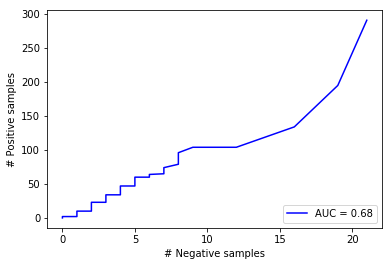

In [71]:

import matplotlib.pyplot as plt
#plt.title('Receiver Operating Characteristic')
tpr = test['clicks']
fpr = test['impressions'] - test['clicks']
# sorting data frame by name 
tpr = tpr.sort_values()
fpr = fpr.sort_values()

plt.plot(tpr, fpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('# Positive samples')
plt.xlabel('# Negative samples')
plt.show() 

In [74]:
from matplotlib import pyplot
# feature importance
print(regr.feature_importances_)


[0.00375    0.00791667 0.01291667 0.03916667 0.24625    0.01625
 0.1775     0.06708334 0.40125    0.         0.         0.02791667]


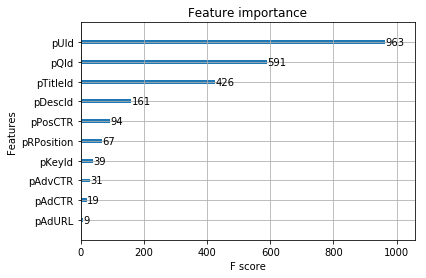

In [73]:
from xgboost import plot_importance
plot_importance(regr)
pyplot.show()
